# Question 8: Does weather have any effect on headway or on-time performance? To help answer this question, the file bna_2022.csv contains historical weather data recorded at Nashville International Airport.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
headway = pd.read_csv('../Data/Headway Data.csv')

In [3]:
weather = pd.read_csv('../Data/bna_weather.csv')

stripped hour from data column to merge the two datasets

In [4]:
headway['NEW_DATE']=headway.DATE
headway['NEW_DATE']= pd.to_datetime(headway.NEW_DATE)
headway['HOUR']=headway.SCHEDULED_TIME.str.slice(0,2).astype(str)

In [5]:
weather['HOUR']=weather.Date.str.slice(11,13).astype(str)
weather['NEW_DATE']=weather.Date.str.slice(0,10).astype(str)
weather['NEW_DATE']= pd.to_datetime(weather.NEW_DATE)

In [6]:
merge_df = headway.merge(weather, on=['NEW_DATE','HOUR'], how= "left")
merge_df

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210132,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210133,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210134,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210135,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
merge_df = merge_df.drop_duplicates(['ADHERENCE_ID'])

In [9]:
merge_df['DEV_PERCENT'] = merge_df.HDWY_DEV/merge_df.SCHEDULED_HDWY * 100

In [10]:
def BUNCH_GAP(value):
    if value >= 50:
        return "Gapped"
    elif value <= -50:
        return "Bunched" 
    else:
        return "On Time"

merge_df['BUNCH_GAP'] = merge_df['DEV_PERCENT'].map(BUNCH_GAP)
merge_df


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction,DEV_PERCENT,BUNCH_GAP
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.166664,On Time
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.809521,On Time
12,120211101,1,76447976,2021-11-01,22,2200,1352,298128,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.047620,On Time
13,120211101,1,76447977,2021-11-01,22,2200,1352,298128,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.476189,On Time
14,120211101,1,76447978,2021-11-01,22,2200,1352,298128,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.777780,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210120,120221101,1,91056034,2022-11-01,7,706,375,329459,0,FROM DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.555560,On Time
2210121,120221101,1,91056035,2022-11-01,7,706,375,329459,0,FROM DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-46.547621,On Time
2210129,120221101,1,91057381,2022-11-01,55,8604,2374,329899,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,On Time
2210133,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23.666670,On Time


In [11]:
merge_df['BUNCH_GAP'].value_counts(dropna=False)



On Time    1392843
Gapped       86564
Bunched      70014
Name: BUNCH_GAP, dtype: int64

Dropping nulls in dev_percent column

On Time    1350769
Gapped       86564
Bunched      70014

Dropping nulls in scheduled headway column:

On Time    1392843
Gapped       86564
Bunched      70014

On Time    1350769
Gapped       86564
Bunched      70014

Without dropping nulls:

On Time    1825137
Gapped       86564
Bunched      70014


In [12]:
merge_df['BUNCH_GAP'].value_counts(normalize=True)

On Time    0.898944
Gapped     0.055869
Bunched    0.045187
Name: BUNCH_GAP, dtype: float64

In [13]:
below_freezing=merge_df.loc[merge_df['temp']<32]
below_freezing['BUNCH_GAP'].value_counts()

On Time    49057
Gapped      3503
Bunched     1723
Name: BUNCH_GAP, dtype: int64

In [14]:
below_freezing['BUNCH_GAP'].value_counts(normalize=True)

On Time    0.903727
Gapped     0.064532
Bunched    0.031741
Name: BUNCH_GAP, dtype: float64

In [17]:
above_freezing=merge_df.loc[merge_df['temp']>32]
above_freezing['BUNCH_GAP'].value_counts()


On Time    1311108
Gapped       81859
Bunched      67196
Name: BUNCH_GAP, dtype: int64

In [18]:
above_freezing['BUNCH_GAP'].value_counts(normalize = True)

On Time    0.897919
Gapped     0.056062
Bunched    0.046020
Name: BUNCH_GAP, dtype: float64

In [ ]:
z

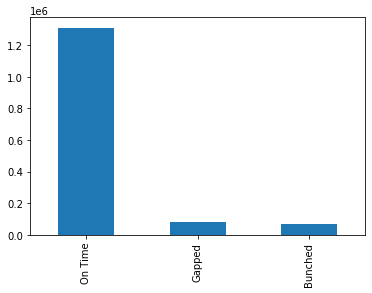

In [19]:
above_freezing['BUNCH_GAP'].value_counts().plot(kind='bar');

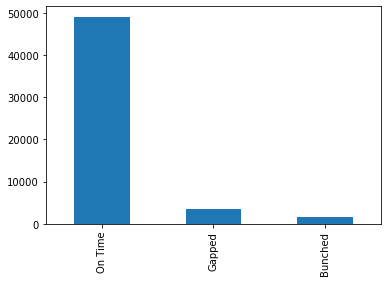

In [20]:
below_freezing['BUNCH_GAP'].value_counts().plot(kind='bar');

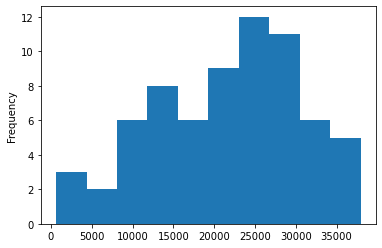

In [23]:
above_freezing['temp'].value_counts().plot(kind='hist');

In [24]:
freezing_rain = below_freezing[['temp','precip_hrly', 'BUNCH_GAP']]
freezing_rain

,temp,precip_hrly,BUNCH_GAP
122595,31.0,0.0,On Time
122596,31.0,0.0,On Time
122597,31.0,0.0,On Time
122599,31.0,0.0,On Time
122600,31.0,0.0,On Time
...,...,...,...
775050,26.0,0.0,On Time
775052,24.0,0.0,On Time
775053,24.0,0.0,On Time
775055,24.0,0.0,On Time


In [25]:
#above_freezing=merge_df_b.loc[merge_df_b['temp']>32]

freezing_rain = below_freezing.loc[below_freezing['precip_hrly']>0]
freezing_rain.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction,DEV_PERCENT,BUNCH_GAP
381940,120220106,1,79332865,2022-01-06,22,2200,1505,302565,0,FROM DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.944447,On Time
381944,120220106,1,79332866,2022-01-06,22,2200,1505,302565,0,FROM DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,On Time
381952,120220106,1,79332868,2022-01-06,22,2200,1505,302543,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.888890,On Time
381956,120220106,1,79332869,2022-01-06,22,2200,1505,302543,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.222220,Gapped
381966,120220106,1,79332871,2022-01-06,22,2200,1505,302559,0,FROM DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.777780,On Time


In [26]:
below_freezing['precip_hrly'].value_counts()

0.00    51900
0.01      817
0.02      671
0.03      381
0.07      264
0.06      250
Name: precip_hrly, dtype: int64

In [27]:
freezing_rain['BUNCH_GAP'].value_counts()

On Time    1771
Gapped      373
Bunched     239
Name: BUNCH_GAP, dtype: int64

In [28]:
freezing_rain['BUNCH_GAP'].value_counts(normalize=True)

On Time    0.743181
Gapped     0.156525
Bunched    0.100294
Name: BUNCH_GAP, dtype: float64

<AxesSubplot:>

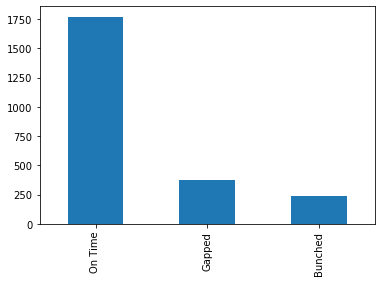

In [29]:
freezing_rain['BUNCH_GAP'].value_counts().plot(kind='bar')

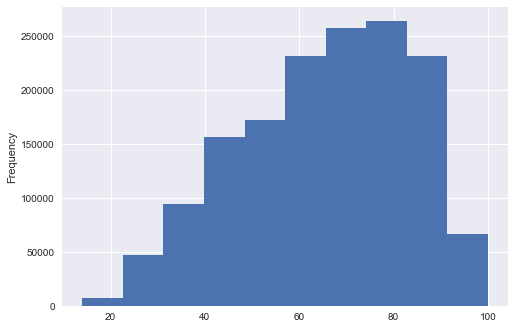

In [31]:
merge_df['temp'].plot(kind='hist')
plt.style.use('seaborn')




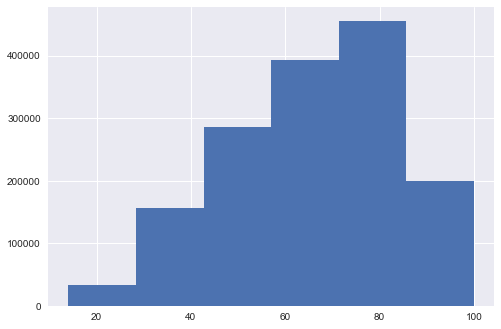

In [32]:
# plt.hist(df_2014['Internet_Users_Pct'], bins=8)


plt.hist(merge_df['temp'], bins=6)
plt.show()

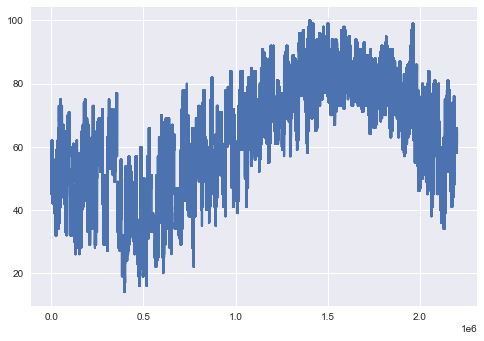

In [33]:

plt.plot(merge_df['temp'])
plt.show()

<AxesSubplot:>

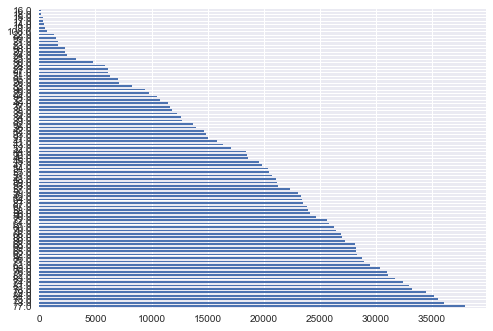

In [34]:
merge_df['temp'].value_counts().plot(kind='barh')

In [36]:
below_freezing.corr()


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,...,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction,DEV_PERCENT
CALENDAR_ID,1.000000,0.089672,0.765471,0.002887,0.002420,0.083298,0.004192,-0.015459,0.005851,-0.009980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028875
SERVICE_ABBR,0.089672,1.000000,0.245738,-0.013943,-0.016539,0.239683,-0.038659,-0.003625,0.003079,0.000489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.045980
ADHERENCE_ID,0.765471,0.245738,1.000000,0.003137,0.003245,0.125883,-0.004833,-0.010006,0.008920,-0.005095,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.056330
ROUTE_ABBR,0.002887,-0.013943,0.003137,1.000000,0.981579,0.026965,0.605881,-0.035156,0.445868,-0.127419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012195
BLOCK_ABBR,0.002420,-0.016539,0.003245,0.981579,1.000000,0.030677,0.612876,-0.035549,0.442303,-0.127355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010914
OPERATOR,0.083298,0.239683,0.125883,0.026965,0.030677,1.000000,0.101112,-0.009559,0.056282,-0.009045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003761
TRIP_ID,0.004192,-0.038659,-0.004833,0.605881,0.612876,0.101112,1.000000,-0.053418,0.138188,-0.053593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012071
OVERLOAD_ID,-0.015459,-0.003625,-0.010006,-0.035156,-0.035549,-0.009559,-0.053418,1.000000,-0.027794,-0.031260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.028059
ROUTE_STOP_SEQUENCE,0.005851,0.003079,0.008920,0.445868,0.442303,0.056282,0.138188,-0.027794,1.000000,-0.081917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014370
TRIP_EDGE,-0.009980,0.000489,-0.005095,-0.127419,-0.127355,-0.009045,-0.053593,-0.031260,-0.081917,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002110
